**Bitcoin vs other assets analisys**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from itertools import product
from datetime import datetime
import pylab
import warnings
from dateutil.relativedelta import relativedelta
from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format='svg'

def invboxcox(y, lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

In [2]:
bitcoin = pd.read_csv("../Desktop/Курсовой проект статистика/BTC 1h.csv", delimiter = ',')
bitcoin['Date'] = [pd.to_datetime(date, format = "%d-%m-%Y %H.%M") for date in bitcoin['Date']]
bitcoin.set_index('Date', inplace = True)
bitcoin = bitcoin.resample('M').mean()
bitcoin = bitcoin[datetime(2015,10,1):datetime(2019,6,1)]
bitcoin.tail()

,Unix Timestamp,Open,High,Low,Close,Volume
Date,,,,,,
2019-01-31,1.547638e+12,3658.587778,3668.377258,3647.739426,3658.211084,119.605165
2019-02-28,1.550187e+12,3648.817768,3657.997677,3640.529970,3649.382336,101.136638
2019-03-31,1.552736e+12,3918.651442,3925.391135,3912.010288,3919.059398,69.810180
2019-04-30,1.555371e+12,5139.170889,5158.923965,5119.569209,5140.797736,120.647089
2019-05-31,1.558006e+12,7226.887823,7273.111761,7180.313387,7231.255914,130.415828


In [3]:
currency = pd.read_csv("../Desktop/Курсовой проект статистика/Forex_Rates.csv", delimiter = ',',
                       parse_dates = ['Time Serie'], index_col = 'Time Serie', na_values = 'ND')
currency.apply(pd.to_numeric, errors = 'ignore')
currency = currency.resample('M').mean()
currency_1 = currency[datetime(2015,10,1):datetime(2019,6,1)]
currency_1.tail()


,Unnamed: 0,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,
2019-01-31,4967.0,1.398590,0.875850,1.474610,0.775305,3.735565,1.330045,6.786345,7.841135,70.710000,...,1.355990,6.538565,108.960500,4.115975,8.547595,8.995035,181.602500,0.989730,30.808000,31.777500
2019-02-28,4988.5,1.401328,0.881117,1.464289,0.768367,3.724433,1.320872,6.736683,7.847717,71.173889,...,1.353922,6.575372,110.440000,4.075917,8.585456,9.248133,178.394444,1.001428,30.798889,31.327222
2019-03-31,5009.0,1.412129,0.885271,1.463062,0.759533,3.840748,1.337052,6.711943,7.849162,69.489524,...,1.354348,6.606048,111.144286,4.076976,8.607167,9.293090,178.095238,1.000519,30.856667,31.735238
2019-04-30,5030.5,1.406264,0.890168,1.489318,0.767527,3.897423,1.337814,6.716068,7.844486,69.406818,...,1.356118,6.645436,111.641364,4.112500,8.562295,9.327950,174.643182,1.008427,30.846818,31.847727
2019-05-31,5053.0,1.439882,0.893909,1.523982,0.778091,3.991491,1.345977,6.851859,7.847777,69.782727,...,1.370636,6.672791,109.971364,4.167477,8.738686,9.592136,176.150000,1.010727,31.221818,31.796364


In [4]:
oil = pd.read_csv("../Desktop/Курсовой проект статистика/BrentOilPrices.csv", delimiter = ',',
                 parse_dates = ['Date'], index_col = 'Date')
oil = oil.resample('M').mean()
oil = oil [datetime(2015,10,1):datetime(2019,6,1)]

oil.tail()

,Price
Date,
2019-01-31,59.409545
2019-02-28,63.960500
2019-03-31,66.138571
2019-04-30,71.233333
2019-05-31,71.317727


In [5]:
gold = pd.read_csv("../Desktop/Курсовой проект статистика/gold_monthly.csv", delimiter = ',',
                  parse_dates = ['Date'], index_col = 'Date')
gold = gold [datetime(2015,10,1):datetime(2019,5,31)]
gold.tail()

,Price
Date,
2019-01-01,1291.630
2019-02-01,1319.755
2019-03-01,1302.286
2019-04-01,1287.650
2019-05-01,1282.460


**The depiction of the price performance**

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


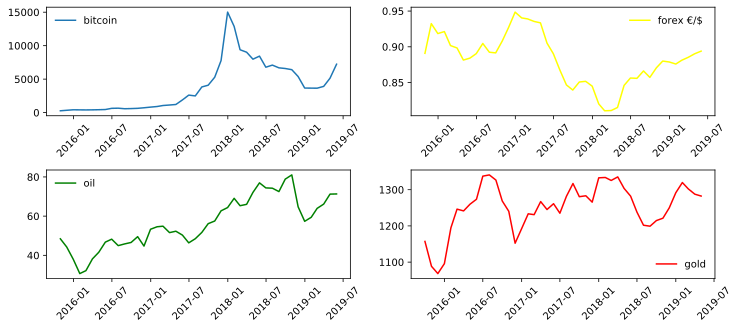

In [6]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(12,5)
ax1,ax2,ax3,ax4 = ax.flatten()
ax1.plot(bitcoin.index, bitcoin['Close'], label = 'bitcoin')
ax1.legend(loc='upper left',frameon=False)
ax2.plot(currency_1.index, currency_1['EURO AREA - EURO/US$'], label = 'forex €/$ ', color = 'yellow')
ax2.legend(loc='upper right',frameon=False)
ax3.plot(oil.index, oil['Price'], label = 'oil', color = 'green')
ax3.legend(loc='upper left',frameon=False)
ax4.plot(gold.index, gold['Price'], label = 'gold', color = 'red')
ax4.legend(loc='lower right',frameon=False)
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)
ax4.tick_params(axis='x', rotation=45)
plt.subplots_adjust(hspace = 0.5)


**Correalation dependence**

Forex €/$

In [7]:
forex_cor = np.corrcoef(bitcoin['Close'], currency_1['EURO AREA - EURO/US$'])
forex_cor

array([[ 1.        , -0.78028571],
       [-0.78028571,  1.        ]])

Oil

In [8]:
oil_cor = np.corrcoef(bitcoin['Close'], oil['Price'])
oil_cor

array([[1.        , 0.77223329],
       [0.77223329, 1.        ]])

Gold

In [9]:
gold_cor = np.corrcoef(bitcoin['Close'], gold['Price'])
gold_cor

array([[1.        , 0.40148888],
       [0.40148888, 1.        ]])

<function matplotlib.pyplot.show(*args, **kw)>

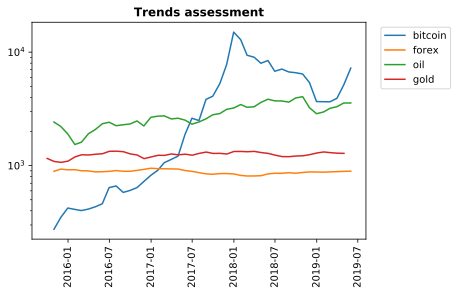

In [10]:
rcParams['figure.figsize'] = 6, 4
plt.plot(bitcoin.index, bitcoin['Close'], label = 'bitcoin')
plt.plot(currency_1.index, currency_1['EURO AREA - EURO/US$']*1000, label = 'forex')
plt.plot(oil.index, oil['Price']*50, label = 'oil')
plt.plot(gold.index, gold['Price'], label = 'gold')
plt.legend(bbox_to_anchor=(1.03,1), loc="upper left")
plt.xticks(rotation='vertical')
plt.yscale(value = 'log')
plt.title('Trends assessment', fontweight='bold')
plt.show

**Проверка стационарности и STL-декомпозиции ряда:**

Критерий Дики-Фулера: p=0.469582


<Figure size 1080x720 with 0 Axes>

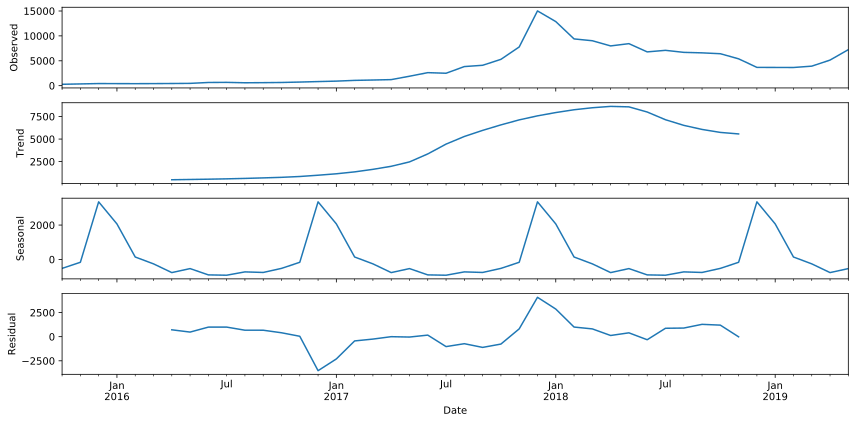

In [40]:
plt.figure(figsize=(15,10))
sm.tsa.seasonal_decompose(bitcoin['Close'], model='additive').plot()
print("Критерий Дики-Фулера: p=%f" % sm.tsa.stattools.adfuller(bitcoin['Close'])[1])   #не отвергает стационарность

Интересно, что мы видим, что курс биткоина подвержен сезонности

**Стабилизация дисперсия**

Преобразование Бокса-Кокса для стабилизации дисперсии:

Оптимальный параметр преобразования Бокса-Кокса: 0.098891
Критерий Дики-Фулера: p=0.725889


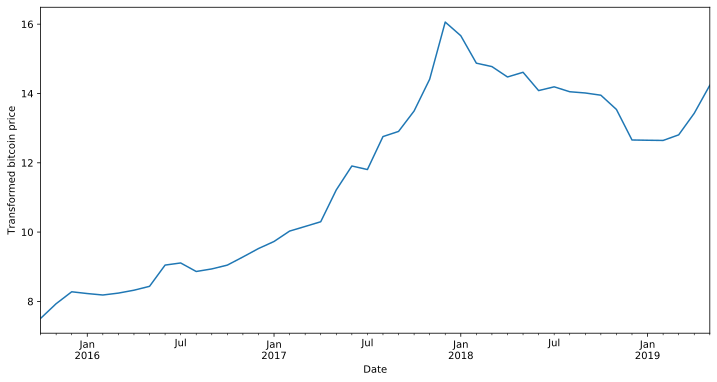

In [12]:
bitcoin['price_box'], lmbda = stats.boxcox(bitcoin['Close'])
rcParams['figure.figsize'] = 12, 6
bitcoin['price_box'].plot()
plt.ylabel(u'Transformed bitcoin price')
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)
print("Критерий Дики-Фулера: p=%f" % sm.tsa.stattools.adfuller(bitcoin['price_box'])[1])

Видим тренд. Попробуем сделать сезонное дифференцирование, сделаем на продифференцированном ряде STL-декомпозицию и проверим стационарность.

Критерий Дики-Фулера: p=0.023610


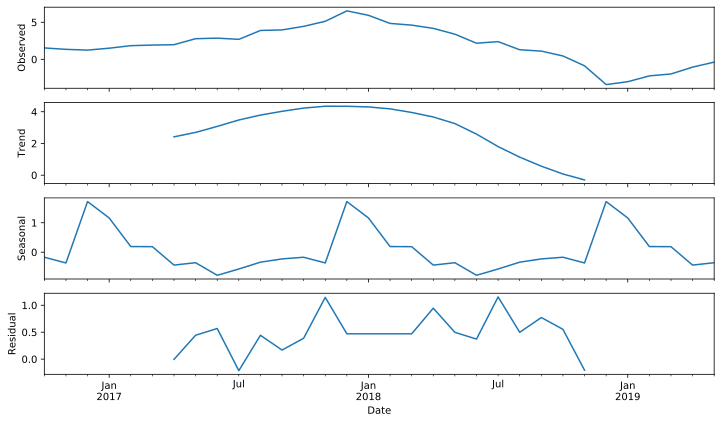

In [44]:
bitcoin['price_box_diff_12'] = bitcoin['price_box'] - bitcoin['price_box'].shift(12)
rcParams['figure.figsize'] = 10, 6
sm.tsa.seasonal_decompose(bitcoin['price_box_diff_12'][12:]).plot()
print("Критерий Дики-Фулера: p=%f" % sm.tsa.stattools.adfuller(bitcoin['price_box_diff_12'][12:])[1])

Стандартное дифференцирование

Dickey–Fuller test: p=0.005807


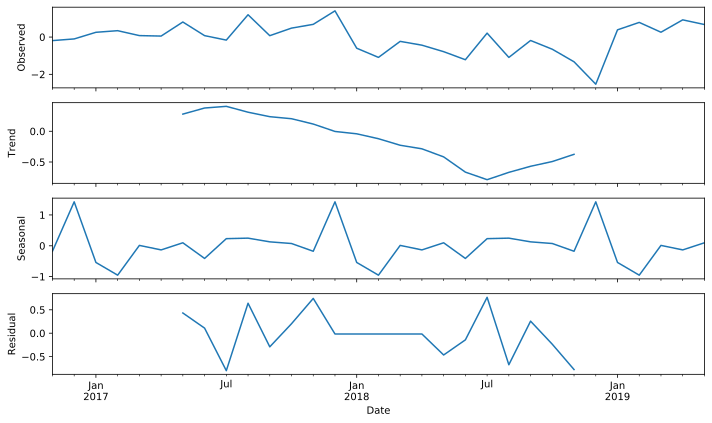

In [47]:
bitcoin['box_diff2'] = bitcoin['price_box_diff_12'] - bitcoin['price_box_diff_12'].shift(1)

# STL-decomposition
sm.tsa.seasonal_decompose(bitcoin.box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(bitcoin.box_diff2[13:])[1])

Гипотеза нестандартности отвергается

**Подбор модели**

Посмотрим ACF и PACF полученного ряда

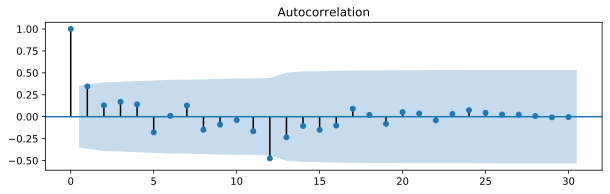

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


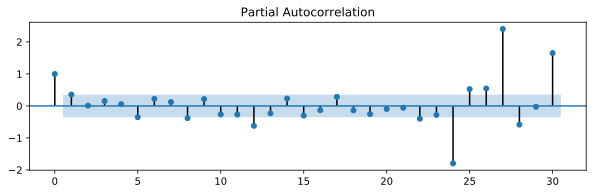

In [49]:
rcParams['figure.figsize'] = 10, 6
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(bitcoin.box_diff2[13:].values.squeeze(), lags=30, ax=ax)
pylab.show()
ax=plt.subplot(212)
sm.graphics.tsa.plot_pacf(bitcoin.box_diff2[13:].values.squeeze(), lags=30, ax=ax)
pylab.show()

Начальные приближенич Q = 1, q = 1, P = 2, p = 2

In [64]:
ps=range(0,3)
d=1
qs=range(0,2)
Ps=range(0,3)
D=1
Qs=range(0,2)

In [65]:
parametrs=product(ps,qs,Ps,Qs)
parametrs_list=list(parametrs)
len(parametrs_list)

36

In [66]:
%%time
results = []
best_aic = float('inf')
warnings.filterwarnings('ignore')

for param in parametrs_list:
    try:
        model=sm.tsa.statespace.SARIMAX(bitcoin['price_box'], order=(param[0], d, param[1]),
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
        #выводим параметры на которых модель не обучается и переходим к следующему набору
    except:
        print('Wrong parametrs:', param)
        continue
    aic = model.aic
    #сохраняет лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

warnings.filterwarnings('default')

Wrong parametrs: (0, 0, 0, 1)
Wrong parametrs: (0, 0, 1, 1)
Wrong parametrs: (0, 0, 2, 1)
Wrong parametrs: (0, 1, 0, 1)
Wrong parametrs: (0, 1, 1, 1)
Wrong parametrs: (0, 1, 2, 1)
Wrong parametrs: (1, 0, 0, 1)
Wrong parametrs: (1, 0, 1, 1)
Wrong parametrs: (1, 0, 2, 1)
Wrong parametrs: (1, 1, 0, 1)
Wrong parametrs: (1, 1, 1, 1)
Wrong parametrs: (1, 1, 2, 1)
Wrong parametrs: (2, 0, 0, 1)
Wrong parametrs: (2, 0, 1, 1)
Wrong parametrs: (2, 0, 2, 1)
Wrong parametrs: (2, 1, 0, 1)
Wrong parametrs: (2, 1, 1, 1)
Wrong parametrs: (2, 1, 2, 1)
CPU times: user 10.9 s, sys: 388 ms, total: 11.3 s
Wall time: 3.26 s


In [67]:
result_table = pd.DataFrame(results)
result_table.columns = ['parametrs', 'aic']
print(result_table.sort_values(by = 'aic', ascending=[True]).head())

       parametrs        aic
8   (1, 0, 2, 0)  56.202380
5   (0, 1, 2, 0)  56.975508
11  (1, 1, 2, 0)  58.080142
14  (2, 0, 2, 0)  58.115289
2   (0, 0, 2, 0)  58.588210


**Лучшая модель**

In [68]:
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          price_box   No. Observations:                   44
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                 -24.101
Date:                            Mon, 09 Mar 2020   AIC                             56.202
Time:                                    18:33:43   BIC                             61.938
Sample:                                10-31-2015   HQIC                            58.072
                                     - 05-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3821      0.145      2.629      0.009       0.097       0.667
ar.S.L12      -1.4198      0.147   

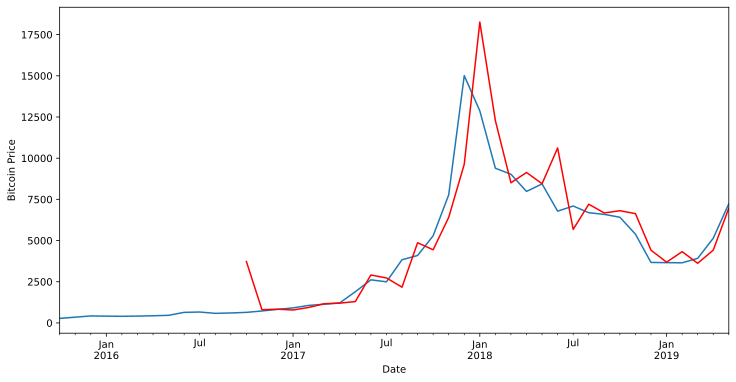

In [69]:
bitcoin['model'] = invboxcox(best_model.fittedvalues, lmbda)
rcParams['figure.figsize'] = 12, 6
bitcoin['Close'].plot()
bitcoin.model[12:].plot(color='r')
plt.ylabel('Bitcoin Price')
pylab.show()

**Прогноз**

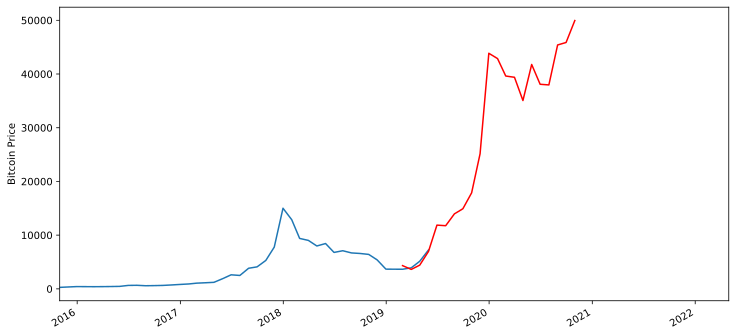

In [72]:
bitcoin2 = bitcoin[['Close']]
date_list = [datetime.strptime("2019-05-31","%Y-%m-%d")+relativedelta(months=x) for x in range(0,36)]
future = pd.DataFrame(index=date_list, columns=bitcoin2.columns)
bitcoin2 = pd.concat([bitcoin2, future])
bitcoin2['forecast'] = invboxcox(best_model.predict(start=40,end=60), lmbda)

rcParams['figure.figsize'] = 12, 6
bitcoin2['Close'].plot()
bitcoin2['forecast'].plot(color='r')
plt.ylabel('Bitcoin Price')
pylab.show()